<a href="https://colab.research.google.com/github/bkkaggle/pytorch-CycleGAN-and-pix2pix/blob/master/CycleGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Take a look at the [repository](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) for more information

# Install

In [1]:
#!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

In [7]:
#import os
#os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [1]:
#!pip install -r requirements.txt

# Datasets

Download one of the official datasets with:

-   `bash ./datasets/download_cyclegan_dataset.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

# モネの絵画を写真の画像に変換horse2zebra

In [ ]:
#!bash ./datasets/download_cyclegan_dataset.sh monet2photo

Specified [monet2photo]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-21 12:09:36--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/monet2photo.zip
people.eecs.berkeley.edu (people.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 305231073 (291M) [application/zip]
`./datasets/monet2photo.zip' に保存中

./datasets/monet2ph 100%[===================>] 291.09M   979KB/s 時間 7m 1s      

2020-03-21 12:16:37 (708 KB/s) - `./datasets/monet2photo.zip' へ保存完了 [305231073/305231073]

mkdir: ./datasets/monet2photo/: File exists
Archive:  ./datasets/monet2photo.zip
replace ./datasets/monet2photo/trainA/01159.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Pretrained models

Download one of the official pretrained models with:

-   `bash ./scripts/download_cyclegan_model.sh [apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower]`

Or add your own pretrained model to `./checkpoints/{NAME}_pretrained/latest_net_G.pt`

In [7]:
#!bash ./scripts/download_cyclegan_model.sh monet2photo

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [monet2photo]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-14 11:54:56--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/monet2photo.pth
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 45575747 (43M)
`./checkpoints/monet2photo_pretrained/latest_net_G.pth' に保存中

./checkpoints/monet 100%[===================>]  43.46M   841KB/s 時間 56s        

2020-03-14 11:55:52 (801 KB/s) - `./checkpoints/monet2photo_pretrained/latest_net_G.pth' へ保存完了 [45575747/455757

# Training

-   `python train.py --dataroot ./datasets/horse2zebra --name horse2zebra --model cycle_gan`

Change the `--dataroot` and `--name` to your own dataset's path and model's name. Use `--gpu_ids 0,1,..` to train on multiple GPUs and `--batch_size` to change the batch size. I've found that a batch size of 16 fits onto 4 V100s and can finish training an epoch in ~90s.

Once your model has trained, copy over the last checkpoint to a format that the testing model can automatically detect:

Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [0]:
#!python train.py --dataroot ./datasets/monet2photo --name monet2photo --model cycle_gan

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
!python test.py --dataroot datasets/monet2photo/testA --name monet2photo_pretrained --model test --results_dir results/ --no_dropout

# Visualize

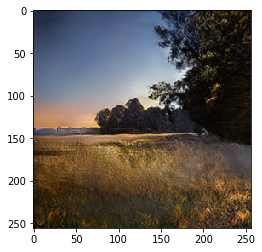

In [5]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00430_fake.png')
plt.imshow(img)

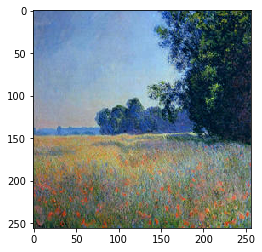

In [6]:
import matplotlib.pyplot as plt

img = plt.imread('./results/monet2photo_pretrained/test_latest/images/00430_real.png')
plt.imshow(img)

In [9]:
!bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

Specified [vangogh2photo]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-14 13:26:36--  https://people.eecs.berkeley.edu/~taesung_park/CycleGAN/datasets/vangogh2photo.zip
people.eecs.berkeley.edu (people.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
people.eecs.berkeley.edu (people.eecs.berkeley.edu)|128.32.189.73|:443 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 306590349 (292M) [application/zip]
`./datasets/vangogh2photo.zip' に保存中

./datasets/vangogh2 100%[===================>] 292.39M   941KB/s 時間 6m 0s      

2020-03-14 13:32:37 (831 KB/s) - `./datasets/vangogh2photo.zip' へ保存完了 [306590349/306590349]

Archive:  ./datasets/vangogh2photo.zip
   creating: ./datasets/vangogh2photo/trainA/
  inflating: ./datasets/vangogh2photo/trainA/00311.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00454.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00461.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00176.jpg  
  inflating: ./datasets/vangogh2photo/tr

  inflating: ./datasets/vangogh2photo/trainA/00099.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00508.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00272.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00453.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00695.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00684.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00680.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00149.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00167.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00357.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00422.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00287.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00706.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00298.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00131.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00485.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00553.jpg  
  inflating: ./datasets/vangogh

  inflating: ./datasets/vangogh2photo/trainA/00303.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00376.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00057.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00397.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00165.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00271.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00044.jpg  
  inflating: ./datasets/vangogh2photo/trainA/00496.jpg  
   creating: ./datasets/vangogh2photo/testB/
  inflating: ./datasets/vangogh2photo/testB/2014-12-10 12:08:40.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-20 00:58:53.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-21 22:11:41.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-26 11:40:43.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-27 17:27:14.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-15 13:13:59.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-11 11:35:13.jpg  
  inflati

  inflating: ./datasets/vangogh2photo/testB/2015-04-20 14:38:56.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-27 20:10:05.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-08 22:52:52.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-12 02:29:43.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-27 02:41:36.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-23 19:06:54.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-24 17:56:49.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-13 20:22:53.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-28 13:03:54.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-11 16:00:38.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-03 07:24:50.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-15 12:33:48.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-04 15:13:33.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-22 19:44:25.jpg  
  inflating: ./datas

  inflating: ./datasets/vangogh2photo/testB/2015-04-20 18:11:28.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-21 18:20:27.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-17 15:07:05.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-28 18:09:59.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-28 16:07:23.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-02 20:54:13.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-20 06:49:02.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-30 13:12:06.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-17 22:35:09.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-12 10:56:59.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-22 18:51:20.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-11 15:22:06.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-29 17:23:50.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-22 17:20:02.jpg  
  inflating: ./datas

  inflating: ./datasets/vangogh2photo/testB/2015-04-18 17:08:45.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-28 16:48:28.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-20 11:42:41.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-03 11:24:41.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-06 21:25:55.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-23 19:35:31.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-04 20:20:12.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-09 06:23:06.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-29 12:17:04.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-06 13:13:13.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-17 04:26:48.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-16 04:31:55.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-07 10:27:51.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-28 20:22:31.jpg  
  inflating: ./datas

  inflating: ./datasets/vangogh2photo/testB/2015-04-21 18:01:12.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-26 20:16:20.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-08 22:26:04.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-09-01 20:21:27.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-18 15:00:35.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-23 06:52:05.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-24 09:14:40.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-29 14:15:57.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-04 05:39:50.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-03 09:48:01.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-10-02 10:51:04.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-08-16 06:30:29.jpg  
  inflating: ./datasets/vangogh2photo/testB/2014-12-01 23:02:22.jpg  
  inflating: ./datasets/vangogh2photo/testB/2015-04-12 02:34:46.jpg  
  inflating: ./datas

  inflating: ./datasets/vangogh2photo/trainB/2015-05-13 02:27:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-29 06:19:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-13 00:17:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-02 05:35:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-16 01:54:37.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-06 02:17:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-07 21:00:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-28 11:11:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-02 23:20:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-28 10:23:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-23 06:56:17.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-12-08 03:46:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-13 19:06:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-19 22:16:54.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-01-11 10:42:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-10 18:39:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-02 22:56:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 14:37:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-25 02:38:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-13 13:10:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-19 21:17:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-12 08:03:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-08 23:24:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-09 09:32:17.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-14 07:59:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-23 10:10:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-15 03:15:16.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-27 00:54:51.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-06-14 22:49:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-01 13:22:16.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-18 15:00:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-15 11:08:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-30 06:56:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-24 12:12:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-16 16:46:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-15 21:29:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-13 17:18:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-27 22:21:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-23 20:06:37.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-24 11:21:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-04 14:51:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2017-01-02 07:26:48.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-02-01 19:10:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-09 17:36:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-04 11:15:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-21 21:55:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-28 09:57:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-27 09:47:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-11 17:41:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-20 04:02:46.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-18 12:44:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-24 17:50:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-20 01:05:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-19 11:03:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-06 03:55:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-17 12:45:53.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-03-15 14:33:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-23 08:09:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-19 10:52:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-09 14:54:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-28 08:29:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-17 10:06:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-12 05:26:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-20 03:30:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-16 13:41:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-03 12:22:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-23 03:25:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-25 03:22:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-17 04:25:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-11 12:47:46.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-01-06 23:15:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-22 11:12:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-15 19:58:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-25 09:19:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-13 06:37:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-10 22:24:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-12 11:31:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-01 20:14:16.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-23 00:50:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 01:09:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-17 01:24:27.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-08 23:09:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-29 18:43:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-22 09:10:32.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-03-12 07:12:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-05 21:37:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-07 02:16:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-17 15:21:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-12 12:56:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-17 19:35:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-16 16:45:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-20 11:39:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-09 21:36:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-27 06:44:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-05 21:58:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-25 19:19:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-01 15:48:38.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-04 13:29:37.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-08-30 19:05:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-08 20:09:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-27 12:08:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-28 06:56:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-06 19:32:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-03 19:46:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-23 10:48:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-06 05:54:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-04 04:13:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-21 14:08:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-24 06:09:37.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-13 19:11:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-07 16:11:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-03 01:49:15.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-05-21 15:47:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-28 21:35:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-15 09:22:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-10 11:38:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-21 07:16:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-03 09:07:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-07 07:34:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-20 19:55:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-21 07:06:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-28 14:17:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-10 03:33:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-02 06:51:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-31 03:26:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-15 10:20:38.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-10-28 19:54:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-30 12:37:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-15 05:53:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-04 18:54:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-06 13:49:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-16 18:55:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-25 13:37:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-06 01:59:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-28 19:00:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-17 15:24:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-01 00:54:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-27 08:45:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-20 20:36:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-09 19:14:53.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-08-05 08:22:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-29 13:27:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-04 01:03:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-11 11:08:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-19 00:07:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-19 15:43:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-01 07:29:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-30 09:32:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-09 21:12:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-29 17:56:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 19:25:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-20 16:54:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 19:43:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-26 21:18:58.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-04-06 14:50:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-01 08:13:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-25 03:11:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-29 16:18:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-08 22:04:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-14 23:02:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-20 04:44:20.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-02 19:55:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-09 14:20:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-24 13:41:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-10 11:59:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-22 10:45:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-20 21:46:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-13 09:06:17.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-02-19 10:37:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-15 00:28:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-01 05:49:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-03 08:32:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-13 16:16:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-19 07:01:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-12-09 01:12:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-25 09:02:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-11-19 22:47:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-10 17:07:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-11 04:48:17.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-23 04:41:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-05 23:04:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-30 17:06:15.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-05-29 04:10:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-25 20:16:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-10 05:26:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-26 18:43:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-24 22:41:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-01 01:03:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-27 11:44:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-14 13:17:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-27 08:56:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-24 10:56:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-29 15:12:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-19 06:01:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-02 00:10:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-26 15:01:28.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-12-13 16:24:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-18 17:12:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-04 02:48:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-16 13:45:37.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-20 03:06:38.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-07 22:23:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-02 11:52:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-16 08:15:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-26 11:45:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-26 15:59:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-15 10:58:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-19 05:20:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-19 12:50:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-25 13:08:25.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-06-11 19:21:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-04 12:49:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-23 14:17:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-27 12:48:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-12 06:57:16.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-08 13:18:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-30 23:08:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-31 12:01:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-01 01:50:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-08 19:52:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-31 06:33:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-01 13:40:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-04 23:28:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-21 01:42:12.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-03-25 23:55:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-28 17:46:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-31 06:26:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-23 00:44:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-11 08:30:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-21 03:59:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-04 20:40:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-01 08:54:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-14 16:40:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-25 18:03:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-09 05:28:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-02 13:52:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-11 13:16:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-21 09:48:31.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-05-06 02:27:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-10 04:20:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-27 10:04:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-13 13:14:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-18 04:12:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-08 16:10:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-18 06:47:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-26 12:26:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-20 09:11:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-13 13:07:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-09 19:51:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-24 10:57:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-16 15:29:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-23 03:39:26.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-06-05 14:51:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-04 22:17:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-08 19:36:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-25 13:03:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-21 18:43:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-07 13:05:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-01 16:12:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-19 03:59:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-26 09:33:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-14 05:05:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-01 11:50:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-10 10:21:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-23 15:24:46.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-19 07:55:50.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-03-01 03:26:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-21 15:25:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-14 00:29:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-07 09:54:49.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-13 00:06:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-22 12:52:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-18 23:38:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-06 02:48:27.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-02 10:34:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-20 19:06:38.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-12 12:27:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-17 22:32:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-06 23:12:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-26 09:03:22.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-11-27 18:31:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-13 14:31:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-03 18:22:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-08 07:42:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-18 11:49:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-23 08:41:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-30 23:08:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-27 17:03:16.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-25 16:53:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-21 00:57:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-25 19:31:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-06 02:13:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-27 03:46:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-02 19:10:45.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-04-21 07:37:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-07 04:26:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-27 17:56:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-27 06:35:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-04 13:07:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-04 07:45:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-19 20:07:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-07 08:26:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-02 02:58:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-28 01:13:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-20 00:59:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-25 04:32:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-18 04:29:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-11-18 06:23:04.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-07-16 18:09:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-27 11:02:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-23 14:06:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-29 10:16:20.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-24 13:41:46.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-22 09:35:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-21 08:57:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-22 18:36:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-01 10:55:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-10 23:22:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-21 08:00:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-31 16:55:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-10 20:11:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-02 12:09:21.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-04-07 08:47:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-24 01:54:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-01 21:23:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-06 23:40:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-15 11:08:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-17 08:06:27.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-11 06:45:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-02 19:32:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-12 00:50:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-16 13:10:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-06 05:37:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-02 17:03:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-29 03:21:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-22 18:19:23.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-10-03 07:29:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-25 15:02:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-06 09:07:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-15 06:33:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-08 11:38:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-05 10:32:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-23 09:55:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-06 01:27:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-27 17:28:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-30 22:35:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-30 05:15:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-18 08:54:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-11 01:07:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-25 11:50:08.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-01-20 12:01:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-25 19:02:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-28 07:22:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-17 07:55:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-15 06:11:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-11 13:32:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-22 19:38:38.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-21 01:40:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-03 03:19:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-18 12:58:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-17 10:11:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-03 08:38:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-06 13:05:20.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-09 19:57:48.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-04-23 00:59:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-22 07:47:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-08 22:17:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-20 13:37:27.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-12 19:56:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-21 00:36:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-09 10:50:38.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-18 08:18:39.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-01 19:39:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-06 18:59:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-10 15:23:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-31 20:56:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-20 18:09:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-16 11:05:49.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2014-05-29 14:05:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-19 06:32:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-16 10:21:49.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-19 14:05:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-06 18:19:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-04 10:42:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-06 15:11:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-24 11:41:11.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-17 13:57:45.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-29 15:27:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-12-10 19:40:14.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-23 09:23:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-16 06:19:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-10 12:01:50.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-06-17 05:55:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-11 15:16:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-24 04:01:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-18 15:46:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-15 01:04:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-24 14:54:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-28 02:55:10.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-30 20:52:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-02 17:50:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-26 22:40:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-20 22:06:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-05 13:03:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-06 13:12:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-08 17:38:43.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-12-05 10:09:42.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-09 22:06:17.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-31 17:57:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-21 19:47:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-12-10 01:57:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-22 01:15:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-15 14:56:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-29 11:54:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-05 05:41:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-12 10:15:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-11 10:48:03.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-15 03:07:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-30 06:43:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-27 18:15:48.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2013-12-13 02:05:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-06 05:03:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-21 14:35:44.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-03 00:23:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-29 18:27:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-12 14:27:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-24 22:07:37.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-06 14:39:52.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-02 07:36:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-23 02:13:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-18 11:08:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-13 11:24:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-29 06:49:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-27 20:03:06.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-07-10 08:39:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-11 11:16:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-23 23:35:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-14 13:58:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-02 04:01:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-28 19:50:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-02 07:22:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-20 04:00:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-03-12 10:07:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-25 13:28:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-21 07:01:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-30 10:38:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-29 12:34:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-17 15:17:15.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-01-26 09:39:23.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-15 20:39:24.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-02 17:48:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-23 20:06:46.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-29 00:15:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-06 15:57:55.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-12 16:31:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-12 20:47:02.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-04 00:00:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-18 08:17:51.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-11-10 19:30:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-19 07:25:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-19 11:24:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-29 20:48:59.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-01-03 02:17:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-02 15:00:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-27 03:52:21.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-14 22:59:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-18 10:47:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-19 23:50:41.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-27 18:54:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-11 02:19:47.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-30 10:29:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-10 19:34:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-10 01:01:36.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-19 14:08:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-17 05:10:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-29 09:42:53.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-06-10 04:41:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-06 06:03:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-19 01:24:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-02-24 01:11:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-28 08:13:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-02-15 20:43:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-03 17:11:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-07 02:20:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-14 07:20:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-02 13:24:20.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-11 11:18:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-31 22:10:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-18 16:22:30.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-18 13:19:33.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-06-07 11:27:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-07-28 16:09:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-11 12:32:59.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-01 18:59:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-03 00:09:20.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-18 17:27:48.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-06 00:07:06.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-06 09:23:50.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-15 03:52:35.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-01-09 12:01:49.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-06-30 08:00:25.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-22 23:05:49.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-03 18:44:49.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-11-17 05:39:16.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2016-02-21 15:51:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-06-30 16:49:07.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-17 11:12:19.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-01 05:27:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-31 10:47:00.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-06 22:15:08.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-01-27 23:02:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-16 10:18:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-18 08:45:40.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-06 06:29:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-04 17:35:01.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-27 03:31:56.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-01 15:03:54.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-05-04 23:58:07.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-02-06 17:29:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-05-22 13:29:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-03-22 04:27:22.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-10-19 07:49:12.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2013-12-21 12:25:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-09-12 07:50:18.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-04-07 18:12:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-08 16:48:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-05-10 23:19:31.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-06-18 03:57:29.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-04 11:14:33.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-02-16 19:23:32.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-08-31 10:50:53.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-04 09:58:47.jpg  
  infl

  inflating: ./datasets/vangogh2photo/trainB/2015-09-09 19:09:28.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-12-13 07:24:05.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-11-19 07:28:09.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-16 12:08:04.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-03-16 14:44:34.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-04-06 11:15:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-11-14 16:27:58.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2015-07-12 01:28:57.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2014-01-04 08:22:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-06 11:29:13.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-07-03 08:57:43.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-05 04:55:15.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-08-07 02:33:26.jpg  
  inflating: ./datasets/vangogh2photo/trainB/2016-12-02 16:24:37.jpg  
  infl

  inflating: ./datasets/vangogh2photo/testA/00569.jpg  
  inflating: ./datasets/vangogh2photo/testA/00164.jpg  
  inflating: ./datasets/vangogh2photo/testA/00389.jpg  
  inflating: ./datasets/vangogh2photo/testA/00012.jpg  
  inflating: ./datasets/vangogh2photo/testA/00687.jpg  
  inflating: ./datasets/vangogh2photo/testA/00388.jpg  
  inflating: ./datasets/vangogh2photo/testA/00432.jpg  
  inflating: ./datasets/vangogh2photo/testA/00275.jpg  
  inflating: ./datasets/vangogh2photo/testA/00329.jpg  
  inflating: ./datasets/vangogh2photo/testA/00121.jpg  
  inflating: ./datasets/vangogh2photo/testA/00030.jpg  
  inflating: ./datasets/vangogh2photo/testA/00148.jpg  
  inflating: ./datasets/vangogh2photo/testA/00117.jpg  
  inflating: ./datasets/vangogh2photo/testA/00586.jpg  
  inflating: ./datasets/vangogh2photo/testA/00677.jpg  
  inflating: ./datasets/vangogh2photo/testA/00510.jpg  
  inflating: ./datasets/vangogh2photo/testA/00161.jpg  
  inflating: ./datasets/vangogh2photo/testA/0011

  inflating: ./datasets/vangogh2photo/testA/00233.jpg  
  inflating: ./datasets/vangogh2photo/testA/00552.jpg  
  inflating: ./datasets/vangogh2photo/testA/00225.jpg  
  inflating: ./datasets/vangogh2photo/testA/00438.jpg  
  inflating: ./datasets/vangogh2photo/testA/00541.jpg  
  inflating: ./datasets/vangogh2photo/testA/00240.jpg  
  inflating: ./datasets/vangogh2photo/testA/00637.jpg  
  inflating: ./datasets/vangogh2photo/testA/00332.jpg  
  inflating: ./datasets/vangogh2photo/testA/00650.jpg  
  inflating: ./datasets/vangogh2photo/testA/00330.jpg  
  inflating: ./datasets/vangogh2photo/testA/00181.jpg  
  inflating: ./datasets/vangogh2photo/testA/00639.jpg  
  inflating: ./datasets/vangogh2photo/testA/00679.jpg  
  inflating: ./datasets/vangogh2photo/testA/00658.jpg  
  inflating: ./datasets/vangogh2photo/testA/00217.jpg  
  inflating: ./datasets/vangogh2photo/testA/00351.jpg  
  inflating: ./datasets/vangogh2photo/testA/00498.jpg  
  inflating: ./datasets/vangogh2photo/testA/0049

# 画像をゴッホ流の絵画に変換する：モネの絵画をゴッホ風にする


In [15]:
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-14 13:41:30--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 45575747 (43M)
`./checkpoints/style_vangogh_pretrained/latest_net_G.pth' に保存中

./checkpoints/style 100%[===================>]  43.46M   718KB/s 時間 50s        

2020-03-14 13:42:21 (893 KB/s) - `./checkpoints/style_vangogh_pretrained/latest_net_G.pth' へ保存完了 [4557574

In [17]:
!python test.py --dataroot datasets/monet2photo/testA --name style_vangogh_pretrained --model test --results_dir results/ --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

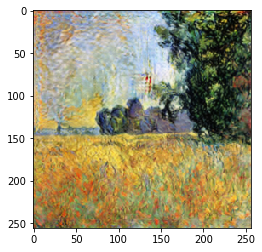

In [18]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/00430_fake.png')
plt.imshow(img)

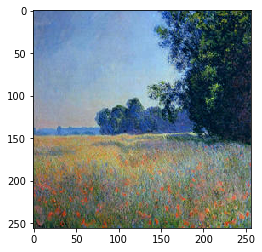

In [19]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/00430_real.png')
plt.imshow(img)

# 手持ちの写真をゴッホ風絵画に変換

写真を directory /datasets/photo2image/testA/ に配置する。testBにも同じ写真を入れたが、必要ないみたい。

In [21]:
!python test.py --dataroot datasets/photo2image/testA --name style_vangogh_pretrained --model test --results_dir results/ --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/photo2image/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

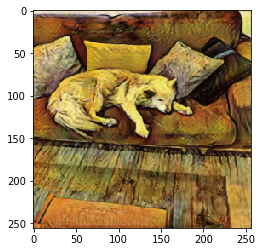

In [22]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/IMG_0069_fake.png')
plt.imshow(img)

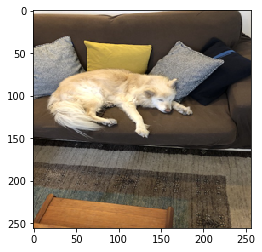

In [23]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/IMG_0069_real.png')
plt.imshow(img)

# 手持ちの写真をセザンヌ風絵画に変換

写真を directory /datasets/photo2image/testA/ に配置する。testBにも同じ写真を入れたが、必要ないみたい。

In [1]:
!bash ./scripts/download_cyclegan_model.sh style_cezanne

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_cezanne]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-15 13:40:20--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_cezanne.pth
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 45575747 (43M)
`./checkpoints/style_cezanne_pretrained/latest_net_G.pth' に保存中

./checkpoints/style 100%[===================>]  43.46M   752KB/s 時間 61s        

2020-03-15 13:41:21 (732 KB/s) - `./checkpoints/style_cezanne_pretrained/latest_net_G.pth' へ保存完了 [4557574

In [2]:
!python test.py --dataroot datasets/photo2image/testA --name style_cezanne_pretrained --model test --results_dir results/ --no_dropout

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/photo2image/testA    	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

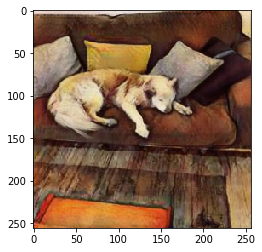

In [5]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_cezanne_pretrained/test_latest/images/20203010_fake.png')
plt.imshow(img)

In [1]:
!bash ./scripts/download_cyclegan_model.sh style_ukiyoe

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_ukiyoe]
警告: タイムスタンプの比較は -O では無効です。
詳しくはマニュアルを参照してください。

--2020-03-21 13:06:25--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_ukiyoe.pth
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu) をDNSに問いあわせています... 128.32.189.73
efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.189.73|:80 に接続しています... 接続しました。
HTTP による接続要求を送信しました、応答を待っています... 200 OK
長さ: 45575747 (43M)
`./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth' に保存中

./checkpoints/style 100%[===================>]  43.46M  1.20MB/s 時間 53s        

2020-03-21 13:07:19 (840 KB/s) - `./checkpoints/style_ukiyoe_pretrained/latest_net_G.pth' へ保存完了 [45575747/45

In [3]:
!python test.py --dataroot datasets/monet2photo/testA/ --name style_ukiyoe_pretrained --model test --results_dir results/ --no_dropout


----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/monet2photo/testA/   	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: -1                            
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

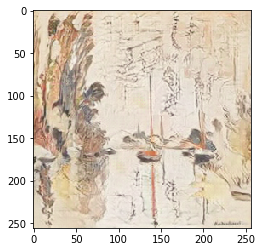

In [5]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/00030_fake.png')
plt.imshow(img)

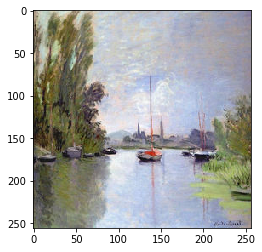

In [6]:
import matplotlib.pyplot as plt

img = plt.imread('./results/style_ukiyoe_pretrained/test_latest/images/00030_real.png')
plt.imshow(img)

以上